In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Mfake = Base.classes.measurement
Sfake = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#view the measurement table column title and type
inspector = inspect(engine)

table1_overview = inspector.get_columns('measurement')
for columns in table1_overview:
    print(columns['name'],columns['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
#view the measurement table data
engine.execute('select * from measurement limit 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [162]:
# Find the most recent date in the data set.
enddate = session.query(Mfake.date).order_by(Mfake.date.desc()).first()

enddate

('2017-08-23')

In [166]:
type(enddate)

sqlalchemy.util._collections.result

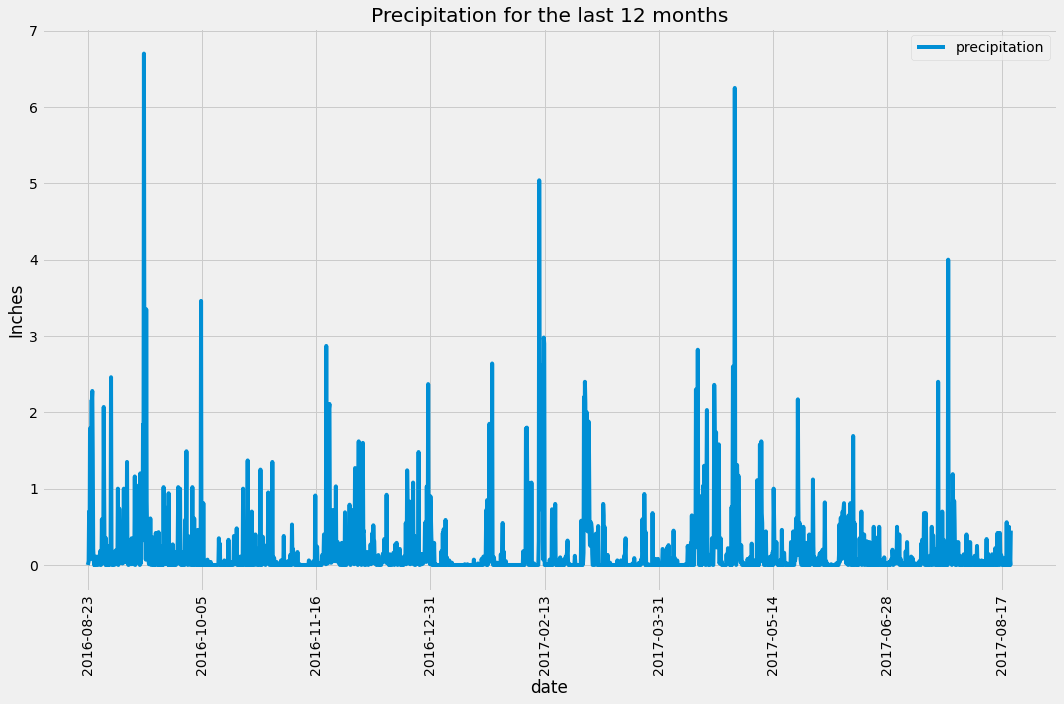

In [99]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
startdate = dt.date(2017,8,23) - dt.timedelta(days=365)

startdate

# Perform a query to retrieve the data and precipitation scores

one_year = (session.query(Mfake.date,Mfake.prcp).filter(Mfake.date>=startdate).statement)


# Save the query results as a Pandas DataFrame and set the index to the date column
df1 = pd.read_sql_query(one_year,session.bind)
df1 = df1.dropna(how='any')

# df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m-%d')

df1 = df1.set_index('date')
# Sort the dataframe by date
df1 = df1.sort_index(ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data

df1.plot(figsize=(15,10));

plt.legend(['precipitation'])
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.title('Precipitation for the last 12 months')


plt.tight_layout()
plt.grid(b=True)





In [100]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df1.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [101]:
#check the station table
table2_view = inspector.get_columns('station')

for columns2 in table2_view:
    print(columns2['name'],columns2['type'])



id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [104]:
#check the station table data in a dataframe

table2_data = (session.query(Sfake.id,Sfake.station,Sfake.name,Sfake.latitude,Sfake.longitude,Sfake.elevation)).all()

df2 = pd.DataFrame(table2_data,columns=['id','station','name','latitude','longitude','elevation'])

df2

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [105]:
# Design a query to calculate the total number stations in the dataset
#was intended to use df methods but since it requires a query then will do as instructed

total_stations = session.query(Sfake.station).group_by(Sfake.station).count()

total_stations

9

In [124]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_count = session.query(Mfake.station,func.count(Mfake.station)).group_by(Mfake.station).\
                order_by(func.count(Mfake.station).desc()).all()

station_count



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [144]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = session.query(func.min(Mfake.tobs),func.max(Mfake.tobs),func.avg(Mfake.tobs)).\
        filter(Mfake.station == station_count[0][0]).first()

print(f"the most active station is {station_count[0][0]}, the lowest temp is {temps[0]}\N{DEGREE SIGN}F,\
      \n the highest temp is {temps[1]}\N{degree sign}F,\n and the average temp is {round(temps[2],2)}\N{degree sign}F")

the most active station is USC00519281, the lowest temp is 54.0°F,      
 the highest temp is 85.0°F,
 and the average temp is 71.66°F


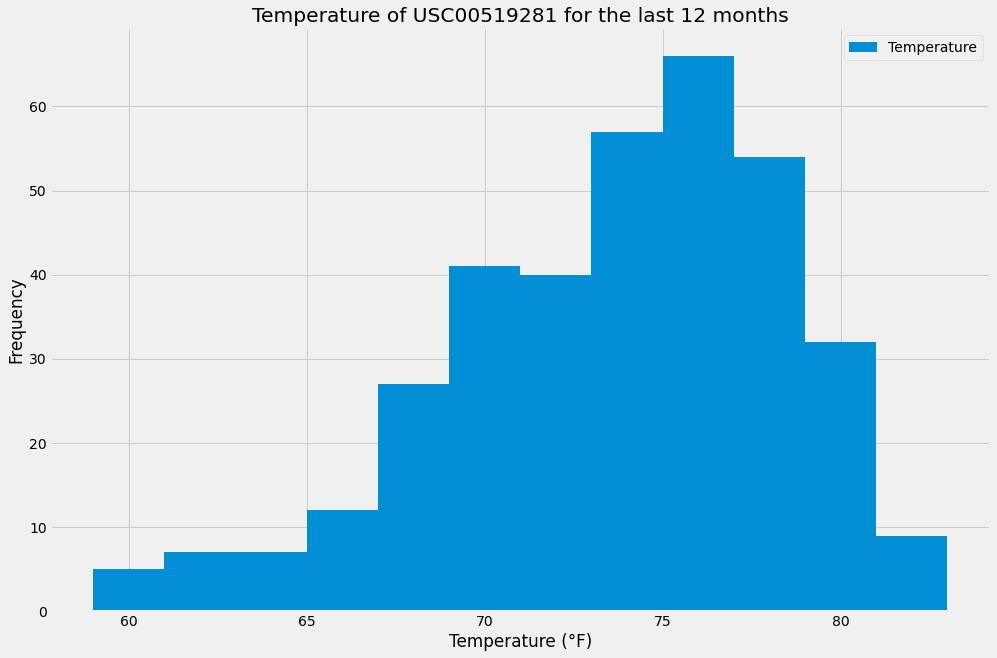

In [209]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

table_joins = session.query(Mfake.station,Mfake.date,Mfake.tobs).\
              filter(Mfake.station == station_count[0][0]).order_by(Mfake.date.desc()).all()

enddate2 = dt.datetime.strptime(table_joins[0][1],'%Y-%m-%d').date()

startdate2 = enddate2 - dt.timedelta(days=365)

one_year2 = session.query(Mfake.tobs).\
            filter(Mfake.station == table_joins[0][0]).\
            filter(Mfake.date >= startdate2).\
            order_by(Mfake.date).all()

df2 = pd.DataFrame(one_year2,columns=['Temperature'])

df2.plot.hist(bins=12,figsize=(15,10));
plt.title(f'Temperature of {table_joins[0][0]} for the last 12 months')
plt.xlabel(f'Temperature (\N{degree sign}F)')
plt.show()


# Close session

In [210]:
# Close Session
session.close()